Import relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [ ]:
data = pd.read_csv('data/ex2data1.txt', names=['x1','x2','y'])
data.head()

In [ ]:
data.shape

In [ ]:
x_raw = np.asarray(data[["x1","x2"]])
y_raw = np.asarray(data["y"])

In [72]:
def plot(x, y, xlabel, ylabel, legend, ax=None):
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    if ax == None:
        # Plot Examples
        plt.xlabel(xlabel) # Exam Score 2
        plt.ylabel(ylabel) # Exam Score 2
        plt.plot(x[pos, 0], x[pos, 1], 'k+', marker='+', c='b')
        plt.plot(x[neg, 0], x[neg, 1], 'ko', c='y')
        plt.legend(legend) #the legend should be an array
    else:
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.plot(x[pos, 0], x[pos, 1], 'k+', marker='+', c='b')
        ax.plot(x[neg, 0], x[neg, 1], 'ko', c='y')
        ax.legend(legend) #,'Admitted', 'Not admitted'


In [69]:
plot(x_raw, y_raw)

NameError: name 'x_raw' is not defined

In [64]:
# add x0 to the feature matrix
X = np.hstack((np.ones_like(y_raw)[:,None],x_raw))
y = y_raw.reshape(-1,1)

NameError: name 'y_raw' is not defined

Create Sigmoid Function

In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_cost(initial_theta, x, y):
    m = x[:,0].size
    h = sigmoid(x @ initial_theta)
    J = None
    J = 1/m *(-np.log(h).T @ y - np.log(1-h).T @ (1-y))[0]
    
    return J

In [ ]:
def gradient(theta, x, y):
    m = x[:,0].size
    h = sigmoid(x @ (theta.reshape(-1,1)))
    
    grad =(1/m)*x.T @ (h-y)

    return(grad.flatten())

In [ ]:
initial_theta = np.zeros(X.shape[1])
cost = compute_cost(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad.shape)

Scipy minimize function

`scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`

In [4]:
from scipy.optimize import minimize

In [ ]:
res = minimize(compute_cost, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})

In [ ]:
# this will return the trained weights
res.x

In [ ]:
def Test(theta, X, threshold=0.5):
    p = sigmoid(X @ theta.T) >= threshold
    return(p.astype('int'))

In [ ]:
p = Test(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

In [ ]:
def test_plot(x, y, exam_1, exam_2):
    plot(x_raw, y_raw)
    if(exam_1 and exam_2 == None):
        x1_min, x1_max = x_raw[:,0].min(), x_raw[:,0].max()
        x2_min, x2_max = x_raw[:,1].min(), x_raw[:,1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        x_test = np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()]
        h = sigmoid(x_test @ res.x)
        h = h.reshape(xx1.shape)
        plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
        plt.legend(['Admitted', 'Not admitted'])
    else:
        x1_min, x1_max = x_raw[:,0].min(), x_raw[:,0].max()
        x2_min, x2_max = x_raw[:,1].min(), x_raw[:,1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        x_test = np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()]
        h = sigmoid(x_test @ res.x)
        h = h.reshape(xx1.shape)
        plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
        plt.scatter(exam_1, exam_2, s=60, c='g', marker='v')
#         plt.legend(['Admitted', 'Not admitted', "pred_pos"])

In [ ]:
test_plot(x_raw, y_raw, None, None)

In [23]:
def predict(trained_weight, x, y):
    input_1 = int(input("Enter Exam 1 Score: "))
    input_2 = int(input("Enter Exam 2 Score: "))

    z = trained_weight[0] + trained_weight[1]*input_1 + trained_weight[2]*input_2
    h = 1 / (1 + np.exp(-z)) #sigmoid

    prob = h
    print('Admission probability is: ', prob, "\n")
    test_plot(x, y, input_1, input_2)
    
    if (prob >= 0.5):
        print("This student has higher chances of gaining admission")
    else:
        print("This student has lower chances of gaining admission")

In [ ]:
predict(res.x, x_raw, x_raw)

Notice the position of the green marker. it reflects the position of your input on the regression plot

## Regularised Logistic Regression

In [5]:
data2 = pd.read_csv('data/ex2data2.txt', names=['x1','x2','y'])
data2.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
data2.shape

(118, 3)

In [7]:
x2_raw = np.asarray(data2[["x1","x2"]])
y2_raw = np.asarray(data2["y"])

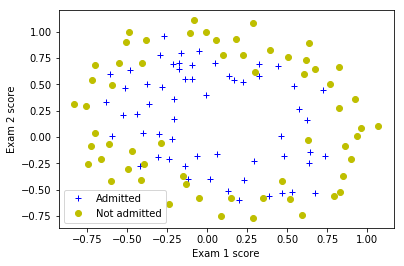

In [10]:
plot(x2_raw, y2_raw)

`class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)`[source](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
mapping = PolynomialFeatures(6)

In [13]:
mapping

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False)

In [14]:
x2_raw_mapped = mapping.fit_transform(x2_raw)
x2_raw_mapped.shape

(118, 28)

In [15]:
def costFunctionReg(theta, X, y, reg):
    m = y.size
    h = sigmoid(X @ theta)
    J = (1/m)*(-(np.log(h).T @ y) - (np.log(1-h).T @ (1-y))) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    #print(J.shape)
    
    return(J)

In [16]:
def gradientReg(theta,X, y, reg):
    m = y.size
    h = sigmoid(X @ theta)
    grad = (1/m)*(X.T @ (h-y)) + (reg/m)*theta  #+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return (grad.flatten())

In [19]:
initial_theta = np.zeros(x2_raw_mapped.shape[1])
costFunctionReg(initial_theta, x2_raw_mapped, y2_raw, 1)
gradientReg(initial_theta,x2_raw_mapped, y2_raw, 1).shape

(28,)

In [20]:
res2 = minimize(costFunctionReg, initial_theta, args=(x2_raw_mapped, y2_raw, 1), method=None, jac=gradientReg, options={'maxiter':3000})

In [21]:
from scipy.optimize import minimize

In [38]:
def predict2(trained_weight, X, threshold=0.5):
#     input_1 = int(input("Enter Exam 1 Score: "))
#     input_2 = int(input("Enter Exam 2 Score: "))

#     z = trained_weight[0] + trained_weight[1]*input_1 + trained_weight[2]*input_2
#     h = 1 / (1 + np.exp(-z)) #sigmoid

#     prob = h
#     print('Admission probability is: ', prob, "\n")
#     test_plot(x, y, input_1, input_2)
    
#     if (prob >= 0.5):
#         print("This student has higher chances of gaining admission")
#     else:
#         print("This student has lower chances of gaining admission")
    
    p = sigmoid(X @ trained_weight.T) >= threshold

    return(p.astype('int'))

91.52542372881356
82.20338983050847
60.16949152542373


In [73]:
def test2_plot(X, Y, X_mapped):
    fig, ax = plt.subplots(1,3, sharey = True, figsize=(17,5))
    
    # Decision boundaries
    # Lambda = 0 : No regularization --> too flexible, overfitting the training data
    # Lambda = 1 : Looks about right
    # Lambda = 100 : Too much regularization --> high bias

    
    for i, C in enumerate([0, 1, 100]):
        plot(X, Y, "test", "test", ["A", "B"], ax.flatten()[i])
        # Optimize costFunctionReg
        res2 = minimize(costFunctionReg, initial_theta, args=(X_mapped, Y, C), method=None, jac=gradientReg, options={'maxiter':3000})

        # Accuracy
        accuracy = 100*sum(predict2(res2.x, X_mapped) == Y.ravel())/Y.size    
        print(accuracy, "%")

        # Plot decisionboundary
        x1_min, x1_max = X[:,0].min(), X[:,0].max(),
        x2_min, x2_max = X[:,1].min(), X[:,1].max(),
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        h = sigmoid(mapping.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]) @ (res2.x))
        h = h.reshape(xx1.shape)
        ax.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
        ax.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

91.52542372881356 %
82.20338983050847 %
60.16949152542373 %


C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


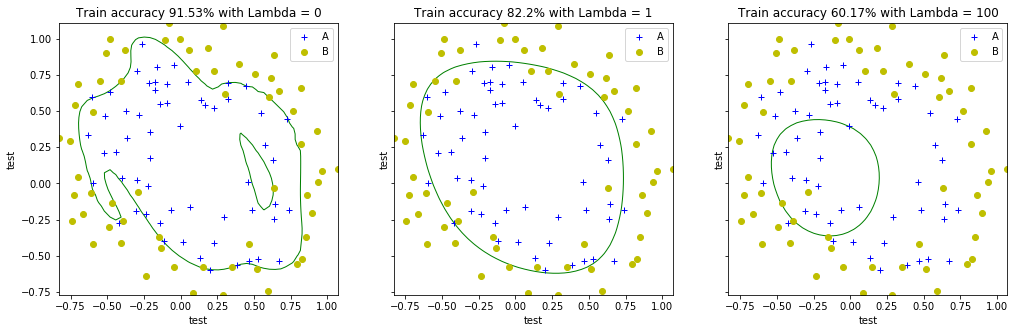

In [74]:
test2_plot(x2_raw, y2_raw, x2_raw_mapped)

`>>>` a=[1,5,9,11,2,66]

`>>>` a[1:]

[5, 9, 11, 2, 66]

`>>>` a[:1]

[1]

`>>>` a[-1:]

[66]

`>>>` a[:-1]

[1, 5, 9, 11, 2]

`>>>` a[3]

11

`>>>` a[3:]

[11, 2, 66]

`>>>` a[:3]

[1, 5, 9]

`>>>` a[-3:]

[11, 2, 66]

`>>>` a[:-3]

[1, 5, 9]

`>>>` a[::1]

[1, 5, 9, 11, 2, 66]

`>>>` a[::-1]

[66, 2, 11, 9, 5, 1]

`>>>` a[1::]

[5, 9, 11, 2, 66]

`>>>` a[::-1]

[66, 2, 11, 9, 5, 1]

`>>>` a[::-2]

[66, 11, 5]

`>>>` a[2::]

[9, 11, 2, 66]